# 使用Mask R-CNN產生遮罩
### 程式修改自『How to Use Mask R-CNN in Keras for Object Detection in Photographs』
https://machinelearningmastery.com/how-to-perform-object-detection-in-photographs-with-mask-r-cnn-in-keras/

In [ ]:
# keras v2.2.4 needed
!pip install keras==2.2.4

In [1]:
# 載入相關套件
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from mrcnn.config import Config
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mrcnn.model import MaskRCNN

In [2]:
# 定義函數，在圖像加框
def draw_image_with_boxes(filename, boxes_list):
    # 讀取圖檔
    data = plt.imread(filename)
    # 顯示圖像
    plt.imshow(data)
    
    # 加框
    ax = plt.gca()
    for box in boxes_list:
        # 上/下/左/右 座標
        y1, x1, y2, x2 = box
        # 計算框的寬高
        width, height = x2 - x1, y2 - y1
        # 畫框
        rect = Rectangle((x1, y1), width, height, fill=False, color='red')
        ax.add_patch(rect)
        
    # 繪圖
    plt.show()

In [3]:
# 定義偵測的組態檔
class TestConfig(Config):
    NAME = "test1"       # 測試名稱，任意取名
    GPU_COUNT = 1        # GPU 個數
    IMAGES_PER_GPU = 1   # 每個 GPU 負責偵測的圖像數
    NUM_CLASSES = 1 + 80 # 類別個數 + 1

Instructions for updating:
Use fn_output_signature instead


f:\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2464: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


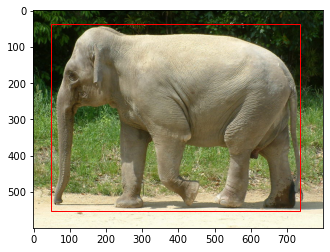

In [4]:
# 建立模型
rcnn = MaskRCNN(mode='inference', model_dir='./', config=TestConfig())

# 載入權重檔
rcnn.load_weights('./MaskRCNN_weights/mask_rcnn_coco.h5', by_name=True)

# 載入圖檔
img = load_img('./images_test/elephant.jpg')
img = img_to_array(img) # 影像轉陣列

# 預測
results = rcnn.detect([img], verbose=0)
# 加框、繪圖
draw_image_with_boxes('./images_test/elephant.jpg', results[0]['rois'])

In [5]:
# 定義類別名稱
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

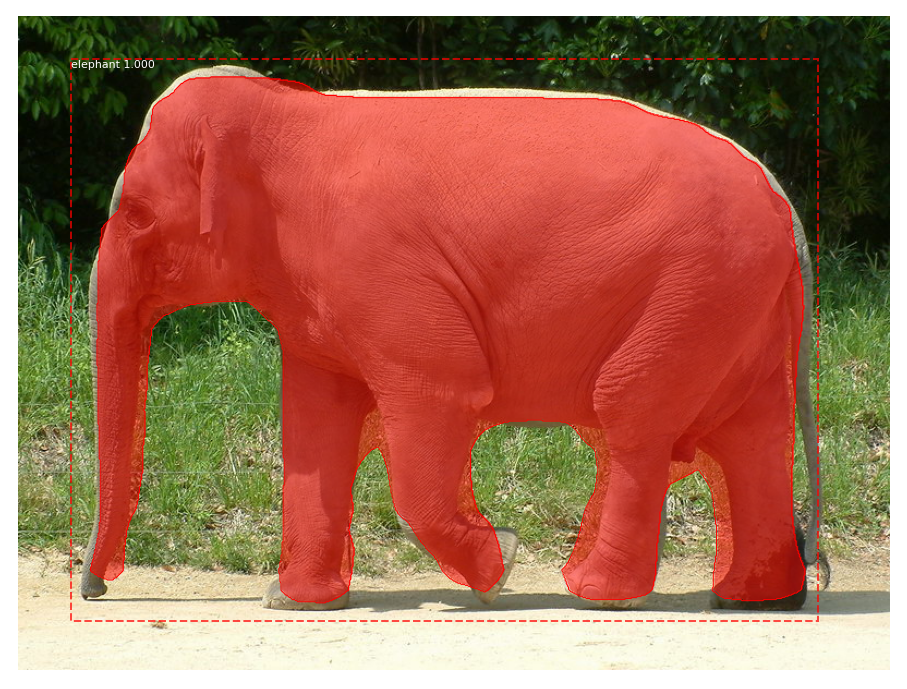

In [6]:
# 加載顯示遮罩的類別   
from mrcnn.visualize import display_instances

# 取的第一個遮罩
r = results[0]
# 顯示框、遮罩、類別、機率  
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

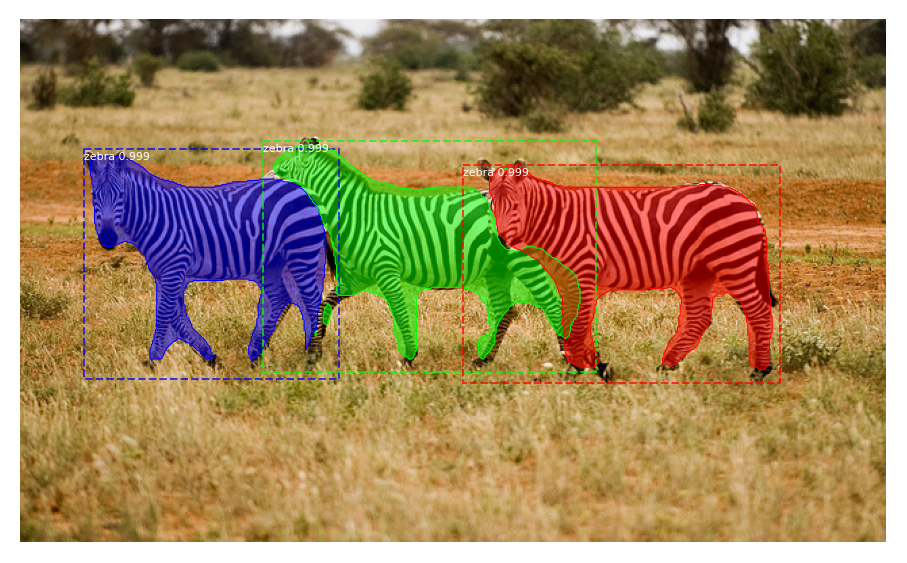

In [7]:
# 載入另一圖檔
img = load_img('./images_Object_Detection/zebra.jpg')
img = img_to_array(img) # 影像轉陣列

# 預測
results = rcnn.detect([img], verbose=0)

# 取的第一個遮罩
r = results[0]
# 顯示框、遮罩、類別、機率  
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])